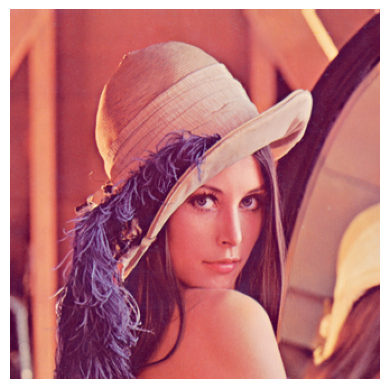

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Download the image
# The original URL was incorrect, leading to a 404 error.
# Updated to a working URL for the Lenna image.
url = 'https://upload.wikimedia.org/wikipedia/en/thumb/7/7d/Lenna_%28test_image%29.png/330px-Lenna_%28test_image%29.png'
# Define a custom User-Agent header to comply with Wikimedia Commons' policy
headers = {
    'User-Agent': 'MyBot/1.0 (your-email@example.com)'
    # Please replace 'your-email@example.com' with your actual email address
    # Or a descriptive name for your application
}

response = requests.get(url, stream=True, headers=headers)
response.raise_for_status() # Raise an exception for bad responses (like 403)
img = Image.open(BytesIO(response.content))


# Convert the image to a NumPy array
image = np.array(img)

# Define the area of the image to be altered
#x_start, y_start, x_end, y_end = 100, 100, 200, 200

# Set the selected area to blue [0, 0, 255]
#image[y_start:y_end, x_start:x_end] = [0, 0, 255]

# Display the modified image
plt.imshow(image)
plt.axis('off')
plt.show()

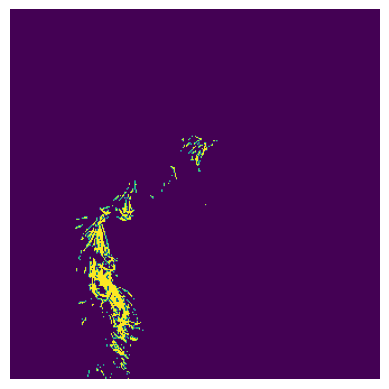

In [34]:
red_mask = (image[:, :, 0] > image[:,:,1]) & (image[:, :, 0] < image[:,:,2])
plt.imshow(red_mask)
plt.axis('off')
plt.show()

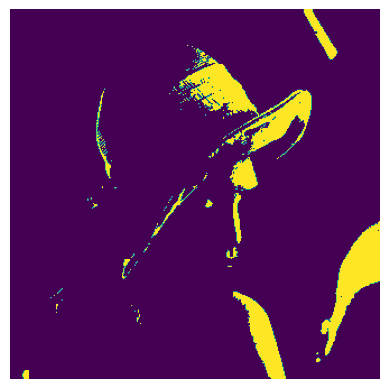

In [36]:
avg_rgb_mask = np.mean(image, axis = 2) >192
plt.imshow(avg_rgb_mask)
plt.axis('off')
plt.show()

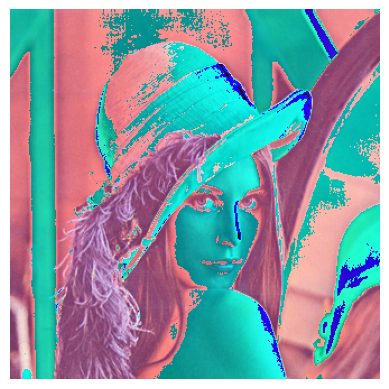

In [39]:
brightness_increase = 50
bright_image_np = np.clip(image + brightness_increase, 0, 255).astype(np.uint8)
plt.imshow(bright_image_np)
plt.axis('off')
plt.show()

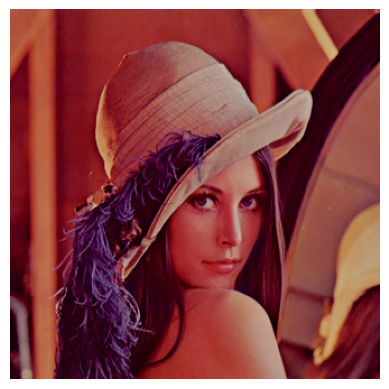

In [38]:
brightness_decrease = -50
dark_image_np = np.clip(image + brightness_decrease, 0, 255).astype(np.uint8)
plt.imshow(dark_image_np)
plt.axis('off')
plt.show()

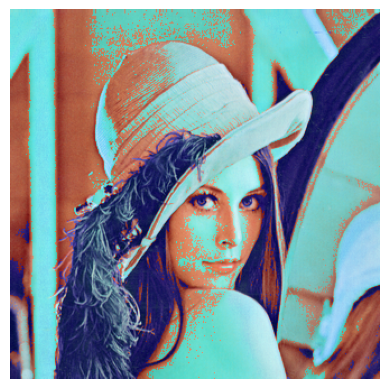

In [41]:
hue_factor = 120.5

image_hsv = np.array(Image.fromarray(image).convert('HSV'))
image_hsv[:, :, 0] = (image_hsv[:, :, 0] + hue_factor) % 180
image_hue_shifted = Image.fromarray(image_hsv, mode='HSV').convert('RGB')
plt.imshow(image_hue_shifted)
plt.axis('off')
plt.show()